# 6.3 Geographic Visualization of the Missing Migrants dataset

## Containing
### 1. Import data and libraries
### 2. Data wrangling
### 3. Reversed Geocoding for a JSON file with a common column of location

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import sweetviz as sv
import requests
from geopy.geocoders import Nominatim

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path = r'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'
path

'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'

In [4]:
df_mm = pd.read_pickle(os.path.join(path, 'Data', 'prepared data', 'df_mm.pkl'))
df_mm.head()

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,...,reg_origin,cause_death,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality,inc_type_num,vict_per_incidents
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,1,2014,1,1,0,...,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,1,2014,1,1,0,...,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,1,2014,1,1,0,...,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,1,2014,1,1,0,...,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,5,1,1-4
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,1,2014,1,3,2,...,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,1,1,1-4


In [5]:
# Data profil 

report = sv.analyze(df_mm)
report.show_html('report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 2. Data wrangling

In [10]:
# Transform latitude and longitude columns back to one column coordinates

df_mm['coordinates'] = df_mm['latitude'].astype(str) + ', ' + df_mm['longitude'].astype(str)

print(df_mm[['latitude', 'longitude', 'coordinates']])

        latitude   longitude               coordinates
0      31.650259 -110.366453    31.650259, -110.366453
1      31.597130 -111.737560      31.59713, -111.73756
2      31.940260 -113.011250      31.94026, -113.01125
3      31.506777 -109.315632    31.506777, -109.315632
4      59.155100   28.000000             59.1551, 28.0
...          ...         ...                       ...
13488  32.541568 -117.061009  32.54156785, -117.061009
13489  48.246277   12.410189    48.24627651, 12.410189
13490  46.490423   19.736968    46.49042299, 19.736968
13491  36.076337   35.807006  36.07633665, 35.80700626
13492  39.304150   26.472273   39.30415035, 26.4722731

[13493 rows x 3 columns]


In [9]:
from geopy.geocoders import Nominatim

# Create a geocoder instance
geolocator = Nominatim(user_agent="reverse_geocoding")

# Function to reverse geocode and return the country
def reverse_geocode_country(row):
    coordinates = (row['latitude'], row['longitude'])
    location = geolocator.reverse(coordinates, exactly_one=True)
    
    if location:
        address = location.raw.get('address', {})
        country = address.get('country', '')
        return country
    else:
        return "Location not found"

# Apply the reverse geocoding function to your dataset
df_mm['country'] = df_mm.apply(reverse_geocode_country, axis=1)

# Print the first few rows of the updated dataset
print(df_mm.head())

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=20.9649223&lon=92.2139799&format=json&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [10]:
# Sample seems to big, create a random sample to try reversed geocoding

# Creates a reproducible pattern of random floating numbers between 0-1:
# Set the seed for the random number generator.
np.random.seed(5)

# Compares randomly created uniform numbers to 0.7 to create 70/30 subsamples:
# Create random numbers (the length of the dataframe) ranging between 0 and 1.
# Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
# Store the results of the test in a new list, dev, in the form of boolean values (True and False).
dev = np.random.rand(len(df_mm)) <= 0.7

In [11]:
# Store 70% in the big data frame, dev = True
big = df_mm[dev]

# Store 30% in the big data frame, dev = False
small = df_mm[~dev]

In [12]:
len(big) + len(small)

13493

In [14]:
small.columns

Index(['main_ID', 'incident_ID', 'inc_type', 'region_inc', 'website_date_new',
       'month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'latitude', 'longitude',
       'reg_origin', 'cause_death', 'country_origin', 'migration_route',
       'loc_death', 'info_source', 'UNSD_geo_group', 'source_quality',
       'inc_type_num', 'vict_per_incidents', 'coordinates'],
      dtype='object')

In [15]:
# To speed up process, reduce sample to necessary columns
df_2 = small[['main_ID','region_inc', 'website_date_new',
       'month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'latitude', 'longitude',
       'reg_origin', 'cause_death', 'loc_death', 'UNSD_geo_group', 'source_quality',
       'inc_type_num', 'vict_per_incidents', 'coordinates']]
df_2

,main_ID,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,reg_origin,cause_death,loc_death,UNSD_geo_group,source_quality,inc_type_num,vict_per_incidents,coordinates
1,2014.MMP00002,North America,2014-01-12,1,2014,1,1,0,0,1,31.597130,-111.737560,Latin America / Caribbean (P),Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Northern America,5,1,1-5,"31.59713, -111.73756"
3,2014.MMP00004,North America,2014-01-16,1,2014,1,1,0,1,0,31.506777,-109.315632,Central America,Violence,"near Douglas, Arizona, USA",Northern America,5,1,1-5,"31.506777, -109.315632"
6,2014.MMP00007,Mediterranean,2014-01-19,1,2014,12,12,0,12,0,37.283200,27.000000,Western / Southern Asia (P),Drowning,Waters near Greece while being towed back to T...,Uncategorized,5,1,11-20,"37.2832, 27.0"
11,2014.MMP00012,North America,2014-01-28,1,2014,1,1,0,0,1,32.159000,-112.919000,Latin America / Caribbean (P),Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Northern America,5,1,1-5,"32.159, -112.919"
14,2014.MMP00015,Europe,2014-01-30,1,2014,1,3,2,2,-1,50.935500,2.000000,Southern Asia,Vehicle accident / death linked to hazardous t...,France - Calais,Western Europe,4,1,1-5,"50.9355, 2.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13476,2023.MMP1034,Central America,2023-10-06,10,2023,1,1,0,1,0,28.704685,-100.516723,Central America,Violence,"Zona Centro, Piedras Negras, Coahuila, Mexico",Central America,1,1,1-5,"28.70468544, -100.516723"
13477,2023.MMP1035,South America,2023-10-07,10,2023,1,1,0,1,0,-19.271257,-68.625706,South America,Harsh environmental conditions / lack of adequ...,"Three kilometers east of the Achauta church, i...",South America,3,1,1-5,"-19.27125692, -68.6257058"
13481,2023.MMP1039,North America,2023-10-10,10,2023,1,2,1,1,0,29.282334,-98.659184,Latin America / Caribbean (P),Accidental death,"On I-35 Highway,Von Ormy, Bexar County, Texas,...",Northern America,1,1,1-5,"29.28233361, -98.65918426"
13488,2023.MMP1046,North America,2023-10-11,10,2023,1,3,2,1,0,32.541568,-117.061009,Western Africa,Sickness / lack of access to adequate healthcare,Open air detention site near San Ysidro border...,Northern America,3,1,1-5,"32.54156785, -117.061009"


In [16]:
# Create an even smaller subsample to test code

# Creates a reproducible pattern of random floating numbers between 0-1:
# Set the seed for the random number generator.
np.random.seed(5)

# Compares randomly created uniform numbers to 0.7 to create 70/30 subsamples:
# Create random numbers (the length of the dataframe) ranging between 0 and 1.
# Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
# Store the results of the test in a new list, dev, in the form of boolean values (True and False).
dev = np.random.rand(len(df_2)) <= 0.7

In [17]:
# Store 70% in the big data frame, dev = True
big_2 = df_2[dev]

# Store 30% in the big data frame, dev = False
small_2 = df_2[~dev]

In [18]:
len(big_2) + len(small_2)

4077

### 3. Reversed Geocoding for a JSON file with a common column of location

In [19]:
from geopy.geocoders import Nominatim

# Create a geocoder instance
geolocator = Nominatim(user_agent="reverse_geocoding")

# Function to reverse geocode and return the country
def reverse_geocode_country(row):
    coordinates = (row['latitude'], row['longitude'])
    location = geolocator.reverse(coordinates, exactly_one=True)
    
    if location:
        address = location.raw.get('address', {})
        country = address.get('country', '')
        return country
    else:
        return "Location not found"

# Apply the reverse geocoding function to your dataset
small_2['country'] = small_2.apply(reverse_geocode_country, axis=1)

# Print the first few rows of the updated dataset
print(small_2.head())

          main_ID     region_inc website_date_new  month_num  year  \
3   2014.MMP00004  North America       2014-01-16          1  2014   
11  2014.MMP00012  North America       2014-01-28          1  2014   
28  2014.MMP00029  Southern Asia       2014-02-26          2  2014   
43  2014.MMP00044  Mediterranean       2014-03-17          3  2014   
50  2014.MMP00051  North America       2014-03-30          3  2014   

    tot_dead_miss  tot_migrants  tot_survive  identified_demogr  \
3               1             1            0                  1   
11              1             1            0                  0   
28              1             1            0                  1   
43              1             1            0                  0   
50              1             1            0                  1   

    unidentified_demogr  ...   longitude                     reg_origin  \
3                     0  ... -109.315632                Central America   
11                    1  .

/var/folders/7f/g3kqhl2s2wd2fd054p87pc_w0000gn/T/ipykernel_60458/3787242899.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_2['country'] = small_2.apply(reverse_geocode_country, axis=1)


In [20]:
from geopy.geocoders import Nominatim

# Create a geocoder instance
geolocator = Nominatim(user_agent="reverse_geocoding")

# Function to reverse geocode and return the country
def reverse_geocode_country(row):
    coordinates = (row['latitude'], row['longitude'])
    location = geolocator.reverse(coordinates, exactly_one=True)
    
    if location:
        address = location.raw.get('address', {})
        country = address.get('country', '')
        return country
    else:
        return "Location not found"

# Apply the reverse geocoding function to your dataset
small['country'] = small.apply(reverse_geocode_country, axis=1)

# Print the first few rows of the updated dataset
print(small.head())

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=24.49902432&lon=-81.412129&format=json&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

## I am proceeding with the very small dataset.

In [22]:
unique_values = small_2['country'].unique()
print(unique_values)

['United States' 'বাংলাদেশ' 'Location not found' 'ليبيا' '中国' 'Türkiye'
 'Maroc ⵍⵎⵖⵔⵉⴱ المغرب' 'Djibouti جيبوتي' 'تونس' 'ประเทศไทย' 'España'
 'México' 'Niger' 'Moçambique' 'Ελλάς' 'Malta' 'France' 'ኢትዮጵያ'
 'Comores Komori جزر القمر' 'مصر' 'السودان' 'Soomaaliya الصومال'
 'Nicaragua' 'República Dominicana' 'سوريا' 'Tanzania' 'България' 'Србија'
 'Malaysia' 'اليمن' 'العراق' 'ایران' 'Italia' 'Burkina Faso' 'Tchad تشاد'
 'Hrvatska' 'Mali' 'Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر' 'Sénégal' 'Malawi'
 'Côte d’Ivoire' 'Togo' 'Liberia' 'Guinée' 'لبنان' 'Bénin' 'Gabon' 'Congo'
 'République démocratique du Congo' 'Indonesia' 'မြန်မာ' 'Slovenija'
 'Nederland' 'Perú' 'Bosna i Hercegovina / Босна и Херцеговина' 'Angola'
 'India' 'United Kingdom' 'Centrafrique' 'Mauritanie موريتانيا' 'Ecuador'
 'Colombia' 'Chile' 'Bolivia' 'Panamá' 'افغانستان' 'Polska' 'Österreich'
 'Северна Македонија' 'România' 'Honduras' 'The Bahamas' 'السعودية']


In [23]:
# Translate these..?

import pycountry


# Function to translate country names to English
def translate_country_name(row):
    try:
        country = pycountry.countries.get(name=row['country'])
        if country:
            return country.name
        else:
            return row['country']  # Return the original name if no translation is found
    except:
        return row['country']  # Handle exceptions

# Apply the translation function to your DataFrame
small_2['translated_country'] = df.apply(translate_country_name, axis=1)

# Print the DataFrame
print(small_2)



ModuleNotFoundError: No module named 'pycountry'

### 2. Trial

In [21]:
import json
import requests
from geopandas import GeoDataFrame
import geopandas as gpd

In [26]:
# Create a GeoSeries from the x, y coordinates
missing_migrants_geometry = gpd.points_from_xy(
    df_mm["longitude"], df_mm["latitude"]
)

# Create a GeoDataFrame from the GeoSeries
geo_df = GeoDataFrame(df_mm, geometry=missing_migrants_geometry)

KeyError: 'missing_migrants'

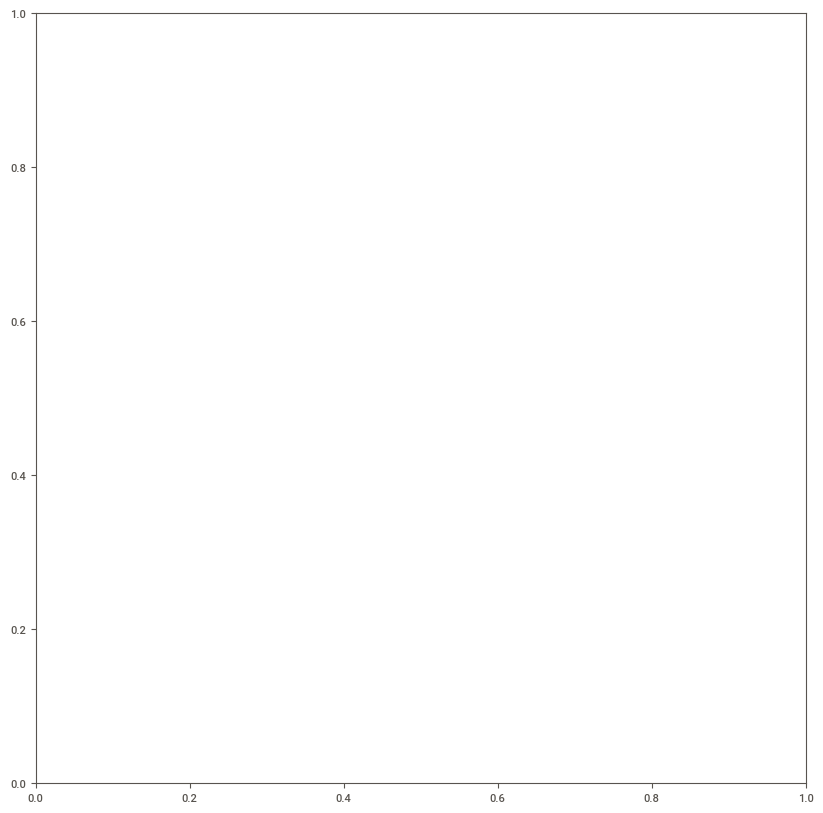

In [28]:
import matplotlib.pyplot as plt

# Create a choropleth map of the missing migrants data
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(
    ax=ax,
    column="missing_migrants",
    cmap="YlOrRd",
    legend=True,
    legend_title="Missing Migrants",
)
ax.set_title("Missing Migrants by World Region")
plt.show()

In [27]:
# Create a GeoDataFrame from the missing migrants data set
geo_df = GeoDataFrame(
    df_mm, geometry=GeoDataFrame.from_xy(
        df_mm['latitude'], df_mm['longitude']
    )
)

AttributeError: type object 'GeoDataFrame' has no attribute 'from_xy'